In [ ]:
# Scenario: A UFC tournament in which 16 fighters compete. 4 rounds: Qualifiers, Quarter-finals, Semi-finals, finals.
# The dataset has information about every fighter and every fight that took place. It also includes the winners
# The task is to perform a descriptive statistical analysis on the data to gain insights and to find the perfect
# independent variables to train a Multi Linear Regression model
# Also, create a Multi Linear Regression Model from scratch using NUMPY

In [ ]:
# The Multi Linear Regression model is built using gradient descent optimization algorithm
# The gradient descent algorithm finds the best values of coefficients and intercept by performing iterative 
# calculations. It finds the best fit line to minimize the error.

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Data Insights

In [110]:
ufc_data = pd.read_csv('custom_ufc_data.csv')
ufc_data.head()

,B_fighter,R_fighter,B_nickname,R_nickname,bout,B_height_cms,B_reach_cms,B_weight_kgs,B_stance,B_total_fights,...,R_strikes_landed_head,R_strikes_landed_body,R_strikes_landed_leg,R_avg_KDS,R_win_by_KO,R_win_by_submission,R_win_by_decision,B_win_percentage,R_win_percentage,winner
0,CONOR MCGREGOR,MICHAEL BISPING,THE NOTORIOUS,THE ASSASSIN,QUALIFIERS,172.72,180.34,67,ORTHODOX,21,...,3,27,10,0.50,0,0,0,74,26,BLUE
1,GEORGE PIERRE,ANDERSON SILVA,THE HAMMER,THE TANK,QUALIFIERS,177.80,182.88,69,SOUTHPAW,15,...,10,44,12,1.80,1,0,0,42,58,RED
2,MARK HUNT,DONALD CERRONE,THE PRINCE,THE OUTLAW,QUALIFIERS,170.18,177.80,66,ORTHODOX,17,...,14,50,6,2.31,1,0,0,40,60,RED
3,ALISTAIR OVEREEM,DANIEL CORMIER,THE SLAYER,THE KNIGHT,QUALIFIERS,170.18,172.72,66,ORTHODOX,20,...,5,31,17,1.33,0,0,0,65,35,BLUE
4,VITOR BELFORT,BROCK LESNAR,THE MENANCE,THE TIGER,QUALIFIERS,172.72,182.88,67,SWITCH,14,...,7,34,8,3.30,0,0,1,30,70,RED


In [111]:
ufc_data.shape

(15, 46)

In [4]:
ufc_data.dtypes

B_fighter                 object
R_fighter                 object
B_nickname                object
R_nickname                object
bout                      object
B_height_cms             float64
B_reach_cms              float64
B_weight_kgs               int64
B_stance                  object
B_total_fights             int64
B_wins                     int64
B_losses                   int64
B_draws                    int64
B_current_win_streak       int64
B_current_form            object
B_strikes_attempted        int64
B_strikes_landed           int64
B_strikes_landed_head      int64
B_strikes_landed_body      int64
B_strikes_landed_leg       int64
B_avg_KDS                float64
B_win_by_KO                int64
B_win_by_submission        int64
B_win_by_decision          int64
R_height_cms             float64
R_reach_cms              float64
R_weight_kgs               int64
R_stance                  object
R_total_fights             int64
R_wins                     int64
R_losses  

In [5]:
ufc_data.columns

Index(['B_fighter', 'R_fighter', 'B_nickname', 'R_nickname', 'bout',
       'B_height_cms', 'B_reach_cms', 'B_weight_kgs', 'B_stance',
       'B_total_fights', 'B_wins', 'B_losses', 'B_draws',
       'B_current_win_streak', 'B_current_form', 'B_strikes_attempted',
       'B_strikes_landed', 'B_strikes_landed_head', 'B_strikes_landed_body',
       'B_strikes_landed_leg', 'B_avg_KDS', 'B_win_by_KO',
       'B_win_by_submission', 'B_win_by_decision', 'R_height_cms',
       'R_reach_cms', 'R_weight_kgs', 'R_stance', 'R_total_fights', 'R_wins',
       'R_losses', 'R_draws', 'R_current_win_streak', 'R_current_form',
       'R_strikes_attempted', 'R_strikes_landed', 'R_strikes_landed_head',
       'R_strikes_landed_body', 'R_strikes_landed_leg', 'R_avg_KDS',
       'R_win_by_KO', 'R_win_by_submission', 'R_win_by_decision',
       'B_win_percentage', 'R_win_percentage', 'winner'],
      dtype='object')

In [6]:
ufc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   B_fighter              15 non-null     object 
 1   R_fighter              15 non-null     object 
 2   B_nickname             15 non-null     object 
 3   R_nickname             15 non-null     object 
 4   bout                   15 non-null     object 
 5   B_height_cms           15 non-null     float64
 6   B_reach_cms            15 non-null     float64
 7   B_weight_kgs           15 non-null     int64  
 8   B_stance               15 non-null     object 
 9   B_total_fights         15 non-null     int64  
 10  B_wins                 15 non-null     int64  
 11  B_losses               15 non-null     int64  
 12  B_draws                15 non-null     int64  
 13  B_current_win_streak   15 non-null     int64  
 14  B_current_form         15 non-null     object 
 15  B_strike

## Data Pre-Processing

In [7]:
ufc_data.isna().sum()

B_fighter                0
R_fighter                0
B_nickname               0
R_nickname               0
bout                     0
B_height_cms             0
B_reach_cms              0
B_weight_kgs             0
B_stance                 0
B_total_fights           0
B_wins                   0
B_losses                 0
B_draws                  0
B_current_win_streak     0
B_current_form           0
B_strikes_attempted      0
B_strikes_landed         0
B_strikes_landed_head    0
B_strikes_landed_body    0
B_strikes_landed_leg     0
B_avg_KDS                0
B_win_by_KO              0
B_win_by_submission      0
B_win_by_decision        0
R_height_cms             0
R_reach_cms              0
R_weight_kgs             0
R_stance                 0
R_total_fights           0
R_wins                   0
R_losses                 0
R_draws                  0
R_current_win_streak     0
R_current_form           0
R_strikes_attempted      0
R_strikes_landed         0
R_strikes_landed_head    0
R

In [112]:
label_encoder = LabelEncoder()
cols = ['B_stance','B_current_form','R_stance','R_current_form','winner']
for col in cols:
    ufc_data[col] = label_encoder.fit_transform(ufc_data[col])

In [9]:
ufc_data.head()

,B_fighter,R_fighter,B_nickname,R_nickname,bout,B_height_cms,B_reach_cms,B_weight_kgs,B_stance,B_total_fights,...,R_strikes_landed_head,R_strikes_landed_body,R_strikes_landed_leg,R_avg_KDS,R_win_by_KO,R_win_by_submission,R_win_by_decision,B_win_percentage,R_win_percentage,winner
0,CONOR MCGREGOR,MICHAEL BISPING,THE NOTORIOUS,THE ASSASSIN,QUALIFIERS,172.72,180.34,67,0,21,...,3,27,10,0.50,0,0,0,74,26,0
1,GEORGE PIERRE,ANDERSON SILVA,THE HAMMER,THE TANK,QUALIFIERS,177.80,182.88,69,1,15,...,10,44,12,1.80,1,0,0,42,58,1
2,MARK HUNT,DONALD CERRONE,THE PRINCE,THE OUTLAW,QUALIFIERS,170.18,177.80,66,0,17,...,14,50,6,2.31,1,0,0,40,60,1
3,ALISTAIR OVEREEM,DANIEL CORMIER,THE SLAYER,THE KNIGHT,QUALIFIERS,170.18,172.72,66,0,20,...,5,31,17,1.33,0,0,0,65,35,0
4,VITOR BELFORT,BROCK LESNAR,THE MENANCE,THE TIGER,QUALIFIERS,172.72,182.88,67,2,14,...,7,34,8,3.30,0,0,1,30,70,1


## Descriptive Data Analysis and Defining Independent Variables (NO.8)

## 1. What was the highest 'win_by' method? What is its percentage?

In [10]:
def count_winby_method(B_col,R_col):
    B_count, R_count = 0,0
    for i in B_col:
        if i==1:
            B_count += 1
    for i in R_col:
        if i==1:
            R_count += 1
    total_count = B_count + R_count
    return total_count

In [11]:
total_KO_count = count_winby_method(ufc_data['B_win_by_KO'],ufc_data['R_win_by_KO'])
total_submission_count = count_winby_method(ufc_data['B_win_by_submission'],ufc_data['R_win_by_submission'])
total_decision_count = count_winby_method(ufc_data['B_win_by_decision'], ufc_data['R_win_by_decision'])
print("Total KO: ", total_KO_count, "\tTotal Submission: ",total_submission_count, "\tTotal Decision: ", total_decision_count)

Total KO:  11 	Total Submission:  2 	Total Decision:  2


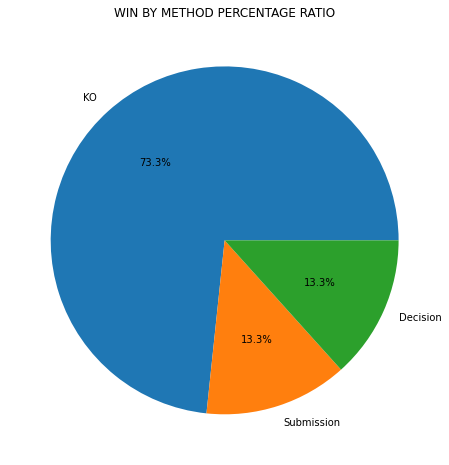

In [12]:
plt.figure(figsize=(10,8))
labels = ['KO','Submission','Decision']
plt.pie([total_KO_count,total_submission_count,total_decision_count],labels=labels,autopct='%1.1f%%')
plt.title('WIN BY METHOD PERCENTAGE RATIO')
plt.show()

## Ans. Hence, the highest number of victories were by KNOCKOUTS (the opponent falls and does not get up) which is 73.3%.

# 

## 2. Where were the highest number of strikes landed throughout the tournament?

In [13]:
total_strikes_landed_head = sum(ufc_data['B_strikes_landed_head']) + sum(ufc_data['R_strikes_landed_head'])
total_strikes_landed_body = sum(ufc_data['B_strikes_landed_body']) + sum(ufc_data['R_strikes_landed_body'])
total_strikes_landed_leg = sum(ufc_data['B_strikes_landed_leg']) + sum(ufc_data['R_strikes_landed_leg'])

HEAD:  315 	BODY:  985 	LEG:  479


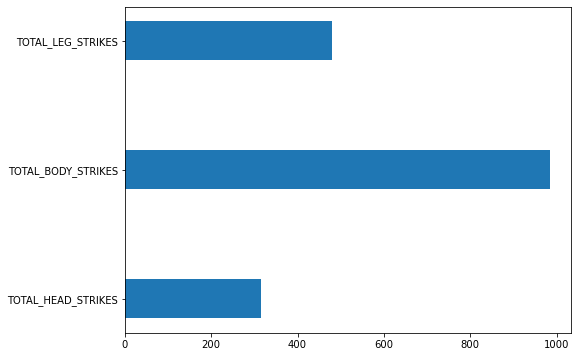

In [14]:
print('HEAD: ',total_strikes_landed_head,'\tBODY: ',total_strikes_landed_body,'\tLEG: ',total_strikes_landed_leg)
plt.figure(figsize=(8,6))
x = ['TOTAL_HEAD_STRIKES','TOTAL_BODY_STRIKES','TOTAL_LEG_STRIKES']
y = [total_strikes_landed_head,total_strikes_landed_body,total_strikes_landed_leg]
plt.barh(x,y,height=0.3)
plt.show()

## Ans. The highest number of strikes were landed on body throughout the tournament.

# 

## 3. What is the average ratio of strikes landed and strikes attempted?

In [15]:
ufc_data['B_strike_ratio'] = ufc_data['B_strikes_landed']/ufc_data['B_strikes_attempted']
ufc_data['R_strike_ratio'] = ufc_data['R_strikes_landed']/ufc_data['R_strikes_attempted']

In [16]:
avg_strike_ratio = (ufc_data['B_strike_ratio'].mean() + ufc_data['R_strike_ratio'].mean())/2
avg_strike_ratio*100

60.308401000464954

In [17]:
def extract_fighter_data(B_col,R_col):
    lst = []
    for i in range(0,8):
        lst.append(ufc_data[B_col][i])
    for i in range(0,8):
        lst.append(ufc_data[R_col][i])
    return lst

In [18]:
fighters = extract_fighter_data('B_fighter','R_fighter')
height_cms = extract_fighter_data('B_height_cms','R_height_cms')
reach_cms = extract_fighter_data('B_reach_cms','R_reach_cms')
weight_kgs = extract_fighter_data('B_weight_kgs','R_weight_kgs')
stance = extract_fighter_data('B_stance','R_stance')
current_form = extract_fighter_data('B_current_form','R_current_form')
strikes_attempted = extract_fighter_data('B_strikes_attempted','R_strikes_attempted')
strikes_landed = extract_fighter_data('B_strikes_landed','R_strikes_landed')
strike_ratio = extract_fighter_data('B_strike_ratio','R_strike_ratio')

In [19]:
data = {'fighters':fighters,'height_cms':height_cms,'reach_cms':reach_cms,'weight_kgs':weight_kgs,'stance':stance,'current_form':current_form,'strikes_attempted':strikes_attempted,'strikes_landed':strikes_landed,'strike_ratio':strike_ratio}
fighter_data = pd.DataFrame(data)

In [20]:
strike_ratio_fighters = fighter_data[['fighters','strike_ratio']]
strike_ratio_fighters

,fighters,strike_ratio
0,CONOR MCGREGOR,0.649123
1,GEORGE PIERRE,0.702381
2,MARK HUNT,0.698925
3,ALISTAIR OVEREEM,0.709402
4,VITOR BELFORT,0.513158
5,RASHAD EVANS,0.673267
6,JON JONES,0.585859
7,CHUCK LIDDELL,0.441558
8,MICHAEL BISPING,0.555556
9,ANDERSON SILVA,0.673469


## Ans. The total average strike ratio of all fighters is around 0.6 which means on an average every fighter's strikes land 60% of the time. And for individual fighters the strike ratio is mentioned as above.

# 

## 4. Which physical factor matters the most in a fight? (height/weight/reach)?

In [21]:
physical_aspect_fighters = fighter_data[['fighters','height_cms','reach_cms','weight_kgs']]

In [22]:
# adding a new column weight_lbs for an accurate calculation
physical_aspect_fighters['weight_lbs'] = physical_aspect_fighters['weight_kgs']*2.205

In [23]:
win_percentage = extract_fighter_data('B_win_percentage','R_win_percentage')

In [24]:
physical_aspect_fighters['win_percentage'] = win_percentage
physical_aspect_fighters

,fighters,height_cms,reach_cms,weight_kgs,weight_lbs,win_percentage
0,CONOR MCGREGOR,172.72,180.34,67,147.735,74
1,GEORGE PIERRE,177.80,182.88,69,152.145,42
2,MARK HUNT,170.18,177.80,66,145.530,40
3,ALISTAIR OVEREEM,170.18,172.72,66,145.530,65
4,VITOR BELFORT,172.72,182.88,67,147.735,30
5,RASHAD EVANS,175.26,177.80,67,147.735,69
6,JON JONES,177.80,180.34,69,152.145,78
7,CHUCK LIDDELL,175.26,170.18,68,149.940,45
8,MICHAEL BISPING,175.26,172.72,66,145.530,26
9,ANDERSON SILVA,170.18,182.88,66,145.530,58


In [25]:
physical_corr = physical_aspect_fighters[['height_cms','reach_cms','weight_lbs','win_percentage']].corr()

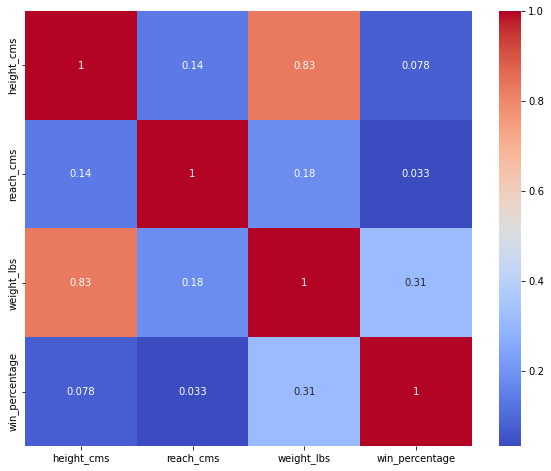

height_cms        0.077655
reach_cms         0.033356
weight_lbs        0.310720
win_percentage    1.000000
Name: win_percentage, dtype: float64

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(physical_corr,annot=True,cmap='coolwarm')
plt.show()
physical_corr['win_percentage']

## Ans. As we can see from the above heatmap, the win_percentage has a much better correlation with weight rather than height or reach of a fighter (almost 10x better than reach & 5x better than height). Thus, we can say that weight of a fighter matters more than height and reach in a fight.

# 

## 5. What is the average weight of all the fighters? According to that what can we say about the weight category of this tournament?

In [27]:
physical_aspect_fighters

,fighters,height_cms,reach_cms,weight_kgs,weight_lbs,win_percentage
0,CONOR MCGREGOR,172.72,180.34,67,147.735,74
1,GEORGE PIERRE,177.80,182.88,69,152.145,42
2,MARK HUNT,170.18,177.80,66,145.530,40
3,ALISTAIR OVEREEM,170.18,172.72,66,145.530,65
4,VITOR BELFORT,172.72,182.88,67,147.735,30
5,RASHAD EVANS,175.26,177.80,67,147.735,69
6,JON JONES,177.80,180.34,69,152.145,78
7,CHUCK LIDDELL,175.26,170.18,68,149.940,45
8,MICHAEL BISPING,175.26,172.72,66,145.530,26
9,ANDERSON SILVA,170.18,182.88,66,145.530,58


In [28]:
avg_weight_fighters = physical_aspect_fighters['weight_kgs'].mean()
avg_weight_fighters

67.1875

In [29]:
for fighter in physical_aspect_fighters['weight_kgs']:
    if fighter < 66:
        print(fighter)
    elif fighter > 70:
        print(fighter)

## Ans. The average weight of fighters is 67.18. Also we checked that no fighter is below 66 kgs and above 70 kgs. Hence according to weight division of UFC, we can say that all fighters belong to 'lightweight' category (66kgs to 70kgs). 

# 

## 6. Which fighting stance acquired the most victories?

In [30]:
# Blue win --> 0
# Red win --> 1

In [31]:
# Orthodox (Right dominant) --> 0
# Southpaw (Left dominant) --> 1
# Switch (Switches between right and left) --> 2

In [32]:
B_stance_wins = pd.DataFrame(ufc_data.loc[ufc_data['winner'] == 0, 'B_stance'])
R_stance_wins = pd.DataFrame(ufc_data.loc[ufc_data['winner'] == 1, 'R_stance'])
B_stance_wins.rename(columns = {'B_stance':'stance'},inplace=True)
R_stance_wins.rename(columns = {'R_stance':'stance'},inplace=True)

In [33]:
stance_wins = pd.concat([B_stance_wins,R_stance_wins])

In [34]:
stance_wins

,stance
0,0
3,0
5,1
6,2
8,0
9,2
10,0
11,2
12,0
1,0


In [35]:
stance_wins.groupby(['stance'])['stance'].count()

stance
0    7
1    1
2    7
Name: stance, dtype: int64

## Ans. Orthodox and Switch stance got 7 victories but Southpaw stance got only 1 victory. Thus, Orthodox and Switch stances have better chances of winning.

# 

## 7. What does the column 'B_avg_KDS' and 'R_avg_KDS' mean? Are they an important factor for a fighter's victory?

In [36]:
avg_kds = extract_fighter_data('B_avg_KDS','R_avg_KDS')
win_percentage = extract_fighter_data('B_win_percentage','R_win_percentage')

In [37]:
kd_data = {'avg_kds':avg_kds,'win_percentage':win_percentage}
kds_win = pd.DataFrame(kd_data)
kds_win

,avg_kds,win_percentage
0,3.01,74
1,1.20,42
2,0.40,40
3,2.04,65
4,1.01,30
5,1.70,69
6,3.50,78
7,1.80,45
8,0.50,26
9,1.80,58


In [38]:
kds_win.corr()

,avg_kds,win_percentage
avg_kds,1.000000,0.867295
win_percentage,0.867295,1.000000


## Ans. The columns 'avg_KDS' indicate the average KNOCKDOWNS (when the fighter hits the opponent and opponent falls down but also gets up to fight again) a fighter gets in a fight. As we can see this feature highly correlates with a fighter's chances of victory.

# 

## 8. What are the winning factors in a fight? (Define independent features that are significant for training a model)

In [39]:
ufc_data_corr = ufc_data.corr()

In [40]:
ufc_data_corr_win = ufc_data_corr[['B_win_percentage','R_win_percentage']]

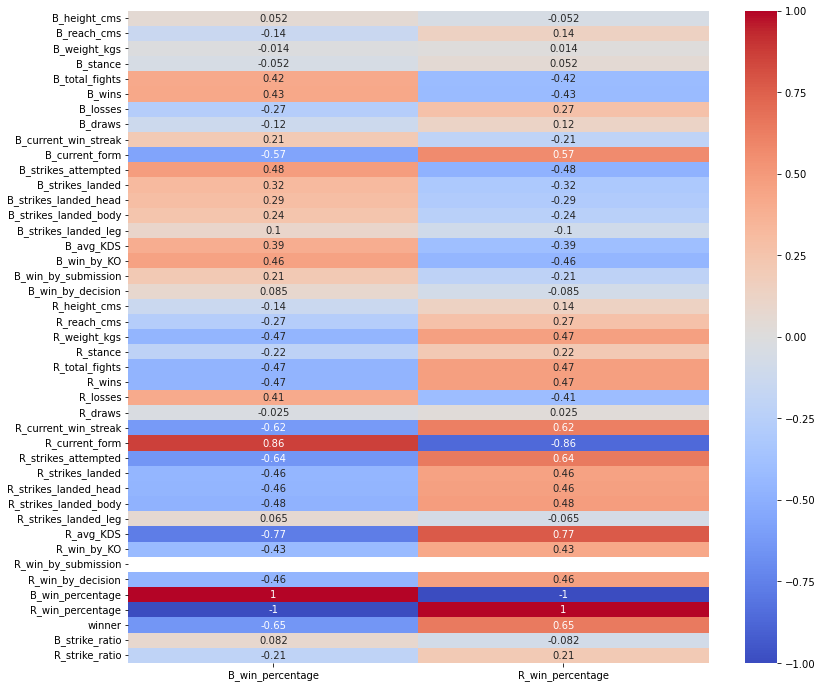

In [41]:
plt.figure(figsize=(13,12))
sns.heatmap(ufc_data_corr_win,cmap='coolwarm',annot=True)
plt.show()

In [42]:
ufc_data_corr_B_win = ufc_data_corr['B_win_percentage']

In [43]:
ufc_data_corr_B_win > 0.4

B_height_cms             False
B_reach_cms              False
B_weight_kgs             False
B_stance                 False
B_total_fights            True
B_wins                    True
B_losses                 False
B_draws                  False
B_current_win_streak     False
B_current_form           False
B_strikes_attempted       True
B_strikes_landed         False
B_strikes_landed_head    False
B_strikes_landed_body    False
B_strikes_landed_leg     False
B_avg_KDS                False
B_win_by_KO               True
B_win_by_submission      False
B_win_by_decision        False
R_height_cms             False
R_reach_cms              False
R_weight_kgs             False
R_stance                 False
R_total_fights           False
R_wins                   False
R_losses                  True
R_draws                  False
R_current_win_streak     False
R_current_form            True
R_strikes_attempted      False
R_strikes_landed         False
R_strikes_landed_head    False
R_strike

In [44]:
ufc_data_corr_B_win < -0.4

B_height_cms             False
B_reach_cms              False
B_weight_kgs             False
B_stance                 False
B_total_fights           False
B_wins                   False
B_losses                 False
B_draws                  False
B_current_win_streak     False
B_current_form            True
B_strikes_attempted      False
B_strikes_landed         False
B_strikes_landed_head    False
B_strikes_landed_body    False
B_strikes_landed_leg     False
B_avg_KDS                False
B_win_by_KO              False
B_win_by_submission      False
B_win_by_decision        False
R_height_cms             False
R_reach_cms              False
R_weight_kgs              True
R_stance                 False
R_total_fights            True
R_wins                    True
R_losses                 False
R_draws                  False
R_current_win_streak      True
R_current_form           False
R_strikes_attempted       True
R_strikes_landed          True
R_strikes_landed_head     True
R_strike

In [125]:
independent_features = ['B_total_fights','B_wins','B_current_form','R_weight_kgs','B_strikes_attempted','B_win_by_KO','R_total_fights','R_wins','R_losses','R_current_win_streak','R_current_form','R_strikes_attempted','R_strikes_landed','R_strikes_landed_head','R_strikes_landed_body','R_avg_KDS','R_win_by_KO']


In [126]:
len(independent_features)

17

## Ans. We have taken consideration of features which gives correlation of 0.4 (either positively or negatively) with B_win_percentage. So, 17 columns will be processed and used as independent variables to train the regression model.

# 

# Building Multiple Linear Regression from scratch

In [127]:
# seperating the data

X = ufc_data[independent_features]
y = ufc_data['B_win_percentage']

In [128]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [3]:
"""
Steps to build the model class:

Step-1: define attributes in __init__ function (number of iterations , learning rate)

Step-2: define the fit method: 
        - Get the no. of samples and no. of features 
        - Initialize coefficients and intercept to zero
        - Calculate the predicted values by using current values of coefficients and intercept
        - Update the coefficient and intercept by subtracting product of the gradients and learning rate
        - This is an iterative process and will go on till the range of number of iterations
        
Step-3: define the predict method:
        - Prediction on new dataset
        - Perform dot product between input X and the learned coefficient 
        - Then further add the result with the learned intercept
"""
pass

In [130]:
# building the model class 

class MultiLinearRegression:
    def __init__(self, n_iters, learning_rate):
        self.learning_rate = learning_rate # controls step size during gradient descent
        self.n_iters = n_iters # no. of iterations/steps for gradient descent
        self.coeff = None # coefficient
        self.inter = None # intercept

    # training the model
    def fit(self, X, y):
        n_samples, n_features = X.shape 

        self.coeff = np.zeros(n_features) # initializing coefficients to 0
        self.inter = 0 # initializing intercept to 0

        for _ in range(self.n_iters):

            y_pred = np.dot(X, self.coeff) + self.inter # calculates the predicted values using current m and c

            # calculate gradient/derivatives for coefficient
            dm = (1 / n_samples) * np.dot(X.T, (y_pred - y)) 
            # calculate gradient/derivative for intercept
            dc = (1 / n_samples) * np.sum(y_pred - y) 
            
            # update coefficient using gradient descent by subtracting product of gradients and learning rate
            self.coeff = self.coeff - self.learning_rate * dm 
            # update intercept using gradient descent by subtracting product of gradients and learning rate
            self.inter = self.inter - self.learning_rate * dc 
    
    # model prediction
    def predict(self, X):
        # dot product between input X and learned coefficient and then adding by learned intercept
        return np.dot(X, self.coeff) + self.inter

In [131]:
regression = MultiLinearRegression(n_iters=7,learning_rate=0.00001)

In [132]:
# training the model
# performing linear regression to predict the output of 'B_win_precentage'

regression.fit(X_train,y_train)

In [133]:
# prediction on test data

y_pred = regression.predict(X_test)

In [134]:
# predicted values

y_pred

array([48.92580549, 47.03823236])

In [135]:
# actual values

y_test

9     54
11    42
Name: B_win_percentage, dtype: int64

In [123]:
# R2 score

scratch_R2 = r2_score(y_test,y_pred)
scratch_R2

0.2898424853998731

In [124]:
# RMSE score

scratch_RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
scratch_RMSE

5.056250639120313

## Comparing the model with sklearn LinearRegression() model

In [302]:
sk_model = LinearRegression()

In [303]:
sk_model.fit(X_train,y_train)

LinearRegression()

In [304]:
sk_y_pred = sk_model.predict(X_test)

In [305]:
sk_y_pred

array([57.19993246, 65.1938524 ])

In [306]:
y_test

9     54
11    42
Name: B_win_percentage, dtype: int64

In [307]:
sk_R2 = r2_score(y_test,sk_y_pred)
sk_R2

-6.6138105131903835

In [308]:
sk_RMSE = np.sqrt(mean_squared_error(y_test,sk_y_pred))
sk_RMSE

16.55588048020563